In [1]:
import numpy as np
import pandas as pd
from lolviz import *

# Introduction to Hashtable

Nowadays, we are generating, referring, and using data every day. As the data set becomes tremendous, looking up the interested element can be extremely challenging. 
As data scientists, we can use hashtable, a mapping data structure with a simple algorithm to achieve the goals of efficient data retrieving.  
Today we will cover the following topics:
* Set up a hashtable
* A good hash function
* An example of hashtable in document searching

In [2]:
# randomly generated data indcluding id, name, email and gender
# data generated from: https://www.mockaroo.com/

df = pd.read_csv('MOCK_DATA.csv')
df.head(5)

,id_num,first_name,last_name,email,gender,id_char
0,5808,Aluin,Derl,aderl0@epa.gov,Male,tzs
1,7652,Vivienne,Roggieri,vroggieri1@chicagotribune.com,Female,sri
2,3412,Barnebas,Horlick,bhorlick2@umich.edu,Male,fwm
3,1370,Worth,Boich,wboich3@wikispaces.com,Male,bqt
4,5169,Nealon,Klein,nklein4@washington.edu,Male,cku


# Linear Search
The time complexity for linear search is O(n).

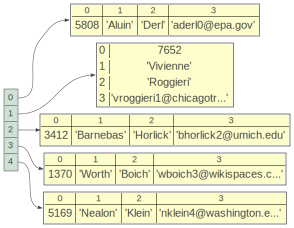

In [3]:
# selecte the numeric id and name columns from the data set
employee_list = df.iloc[:, 0:4].values.tolist()
objviz(employee_list[:5])

In [4]:
# the linear_search function look up the employee id through the entire data set and find the matching one

def linear_search(num):
    output = 'Not Found'
    for record in employee_list:
        if record[0] == num:
            output = record
    return output

In [5]:
employee_id = 8550
linear_search(employee_id)

[8550, 'Niven', 'Bester', 'nbester8@cnn.com']

# Hashtable Search

A hash table stores data in key-value pairs. It uses a hash function to compute a bucket index in which an element will be inserted or searched.  
* The hashtable uses the immutable object as the key: integer, string, tuple.
* No specific requirement for value. It can be an integer, string, set, list, or dictionary. 

### Step 1: Set up empty buckets

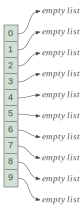

In [6]:
# set up 10 empty buckets

buckets = [[] for i in range(10)]  # make sure each bucket is a separate list
objviz(buckets)

### Step 2: Define a hash function

In [7]:
# set up a hash function to convert employee_id as key to index

def hash_n(key):
    return key % 10


[(k[0], hash_n(k[0])) for k in employee_list[:10]]

[(5808, 8),
 (7652, 2),
 (3412, 2),
 (1370, 0),
 (5169, 9),
 (1407, 7),
 (9288, 8),
 (8550, 0),
 (3844, 4),
 (1397, 7)]

### Step 3: Store data in buckets

In [8]:
# store the first 5 records in the format of (key,value) pairs

for record in employee_list[:5]:
    index = hash_n(record[0])
    buckets[index].append((record[0], record[1:4]))

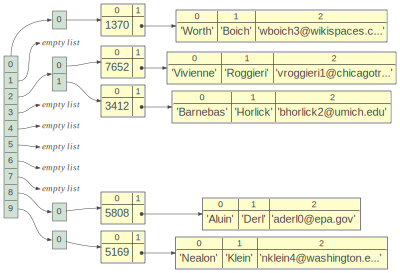

In [9]:
objviz(buckets)

In [10]:
# store the rest records
for record in employee_list[5:]:
    index = hash_n(record[0])
    buckets[index].append((record[0], record[1:4]))

### Search in Hashtable

In [11]:
employee_id = 8550

# search employee id in the corresponding bucket

index = hash_n(employee_id)       # hashing the search term
result = 'Not found'
for record in buckets[index]:     # locate the bucket
    if record[0] == employee_id:  # find the matching id
        result = record
print(result)

(8550, ['Niven', 'Bester', 'nbester8@cnn.com'])


## Use string key to set up hash table

In [12]:
# use English characters as employee id

employee_list2 = df.iloc[:, 1:6].values.tolist()

In [13]:
# convert letters to numbers then to index

def hash_c(key):
    return ord(key[0]) % 10 # convert the first letter to its unicode number and mod by 10


[(k[0], hash_c(k[0])) for k in employee_list2[:5]]

[('Aluin', 5), ('Vivienne', 6), ('Barnebas', 6), ('Worth', 7), ('Nealon', 8)]

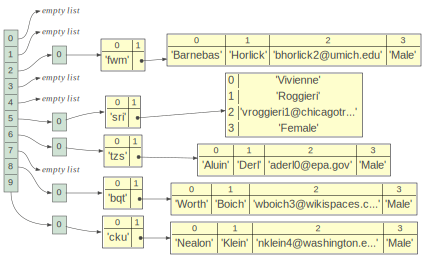

In [14]:
# set up buckets and store the first 5 records in the buckets
buckets = [[] for i in range(10)]

for record in employee_list2[:5]:
    index = hash_c(record[4])
    buckets[index].append((record[4], record[:4]))

objviz(buckets)

In [15]:
# store the rest records 

for record in employee_list2[5:]:
    index = hash_c(record[4])
    buckets[index].append((record[4], record[:4]))

In [16]:
employee_id = 'xye'

# search employee id in the corresponding bucket

index = hash_c(employee_id)
result = 'No record found'
for record in buckets[index]:
    if record[0] == employee_id:
        result = record

print(result)

('xye', ['Paulo', 'Tipping', 'ptipping6@parallels.com', 'Male'])


The time complexity for hash table search is O(n/number of buckets), which can be reduced to O(1).